In [84]:
#Integrated generative AI to predict stock prices, & market sentiment and real-time economic indicators.

#Tools: OpenAI API, LangChain, LlamaIndex, Prophet, Darts, Hugging Face, PyTorch Lightning, Pandas, Plotly, yFinance

import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mplfinance as mpf


In [85]:
#pip install mplfinance

In [99]:
#getting recent data
#recent_data = yf.download("AAPL", period="5d")
data = yf.download(["AAPL", "GOOG", "MSFT", "AMZN"], start="2019-01-01", end="2025-03-07")
print(data.head())

[*********************100%***********************]  4 of 4 completed


Price           Close                                        High             \
Ticker           AAPL       AMZN       GOOG       MSFT       AAPL       AMZN   
Date                                                                           
2019-01-02  37.667179  76.956497  52.105282  95.119812  37.889005  77.667999   
2019-01-03  33.915253  75.014000  50.621113  91.620560  34.757230  76.900002   
2019-01-04  35.363064  78.769501  53.343830  95.881775  35.432237  79.699997   
2019-01-07  35.284359  81.475502  53.228245  96.004044  35.499030  81.727997   
2019-01-08  35.956985  82.829002  53.621330  96.700111  36.212204  83.830498   

Price                                   Low                                   \
Ticker           GOOG       MSFT       AAPL       AMZN       GOOG       MSFT   
Date                                                                           
2019-01-02  52.427625  95.712427  36.787037  73.046501  50.603677  93.069167   
2019-01-03  52.659785  94.245010  33.86

In [100]:
data['50_MA_APPL'] = data['Close']['AAPL'].rolling(window=50).mean()
data['50_MA_GOOG'] = data['Close']['GOOG'].rolling(window=50).mean()
data['50_MA_MSFT'] = data['Close']['MSFT'].rolling(window=50).mean()
data['50_MA_AMZN'] = data['Close']['AMZN'].rolling(window=50).mean()
#data['200_MA'] = data['Close'].rolling(window=200).mean()

In [101]:
#data['50_MA_APPL']

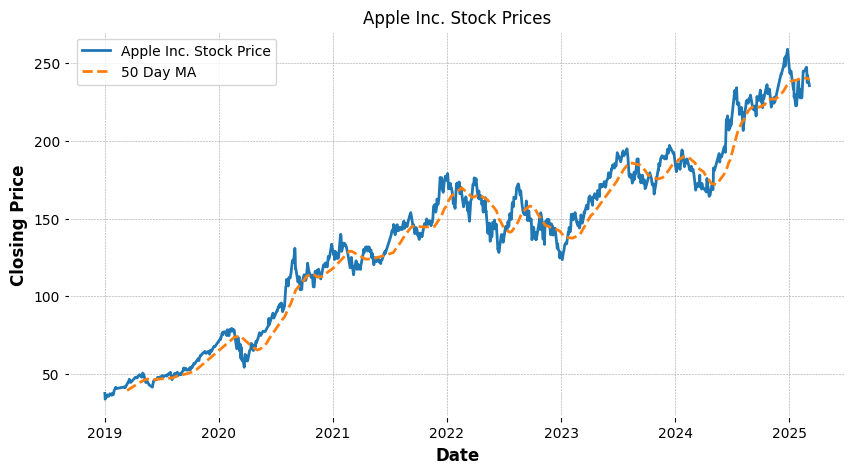

In [102]:
# visualize
plt.figure(figsize=(10, 5))
plt.plot(data["Close"]['AAPL'], label = 'Apple Inc. Stock Price')
plt.plot(data["50_MA_APPL"], label = '50 Day MA', linestyle = '--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title("Apple Inc. Stock Prices")
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Closing Price')

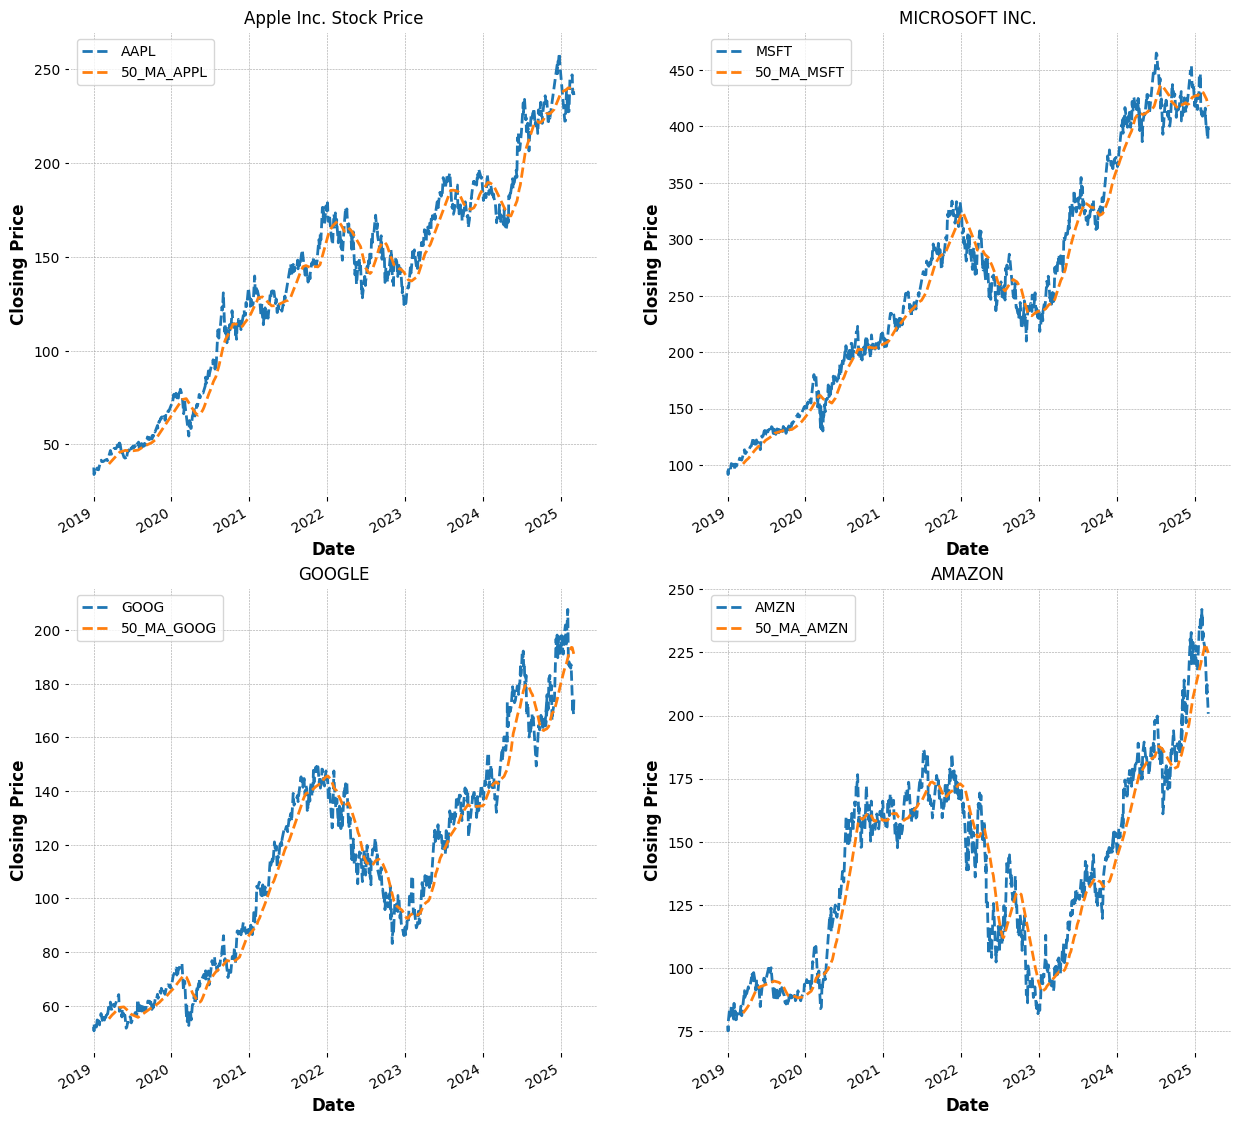

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

data["Close"]['AAPL'].plot(ax=axes[0,0], legend=True, linestyle='--')
data["50_MA_APPL"].plot(ax=axes[0,0], legend=True, linestyle='--')
axes[0,0].set_title('Apple Inc. Stock Price')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Closing Price')



data["Close"]['MSFT'].plot(ax=axes[0,1], legend=True, linestyle='--')
data["50_MA_MSFT"].plot(ax=axes[0,1], legend=True, linestyle='--')
axes[0,1].set_title('MICROSOFT INC.')
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Closing Price')



data["Close"]['GOOG'].plot(ax=axes[1,0], legend=True, linestyle='--')
data["50_MA_GOOG"].plot(ax=axes[1,0], legend=True, linestyle='--')
axes[1,0].set_title('GOOGLE')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Closing Price')



data["Close"]['AMZN'].plot(ax=axes[1,1], legend=True, linestyle='--')
data["50_MA_AMZN"].plot(ax=axes[1,1], legend=True, linestyle='--')
axes[1,1].set_title('AMAZON')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Closing Price')

In [104]:
# AVG DAILY RETURN

company_list = ["MSFT","AAPL", "GOOG", "AMZN"]
for company in company_list:
    data['Daily Return ' + company] = data['Close'][company].pct_change()


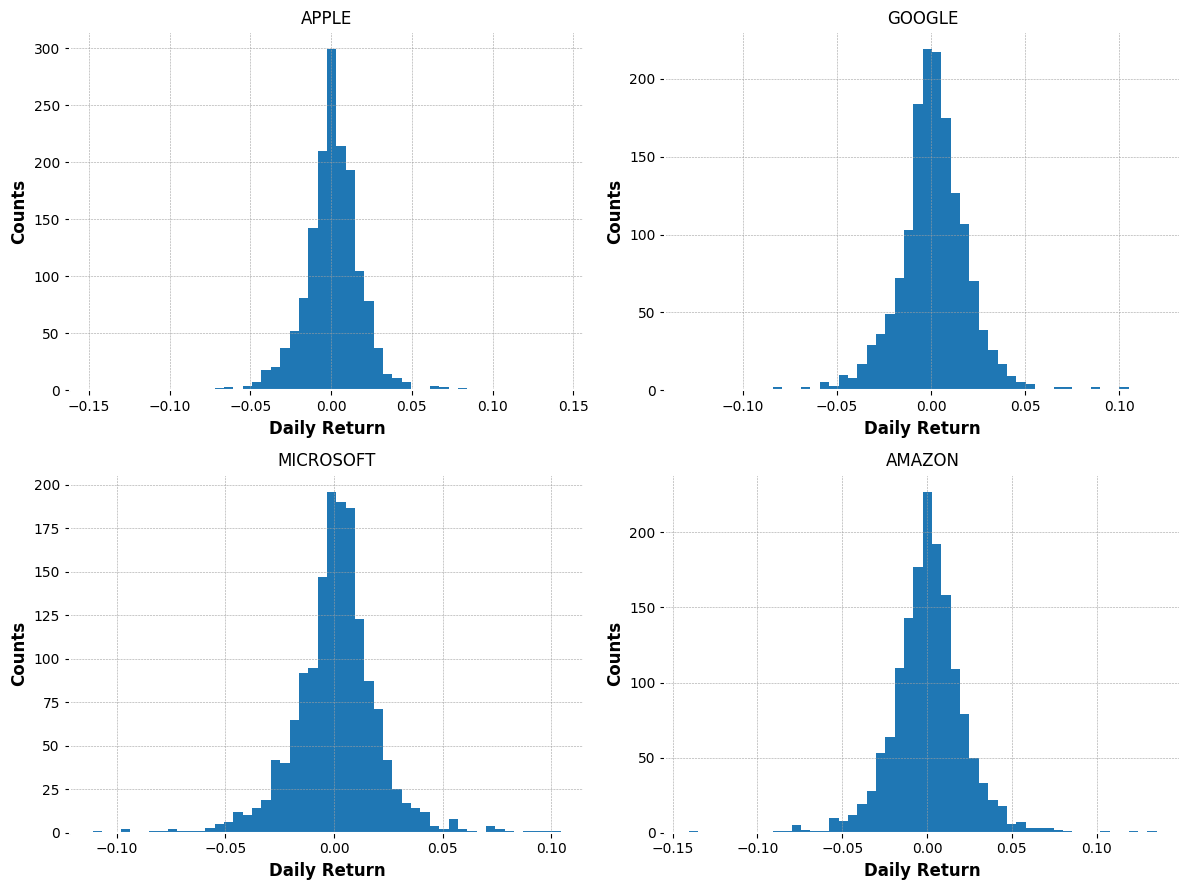

In [105]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    data['Daily Return ' + company].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

Earnings per share (EPS) – The EPS is useful when companies operating in the same industry need to be compared. A company’s EPS indicates its profitability; hence, traders consider an increasing EPS a good sign. The higher the value of EPS, the more the company shares are worth buying.

In [108]:
# Calculate EPS for companies
#ticker = input("Enter a Ticker Sumbol: ")
stock_info = yf.Ticker("GooG").info
EPS = stock_info["trailingEps"]
print (EPS)

8.03


Price to Earnings ratio (P/E) – The P/E ratio indicates how much investors are willing to pay for the earnings of a company. A higher P/E value could mean an overvalued stock. Or, it could imply that the market is expecting the company to perform extremely well over time. On the other hand, a low P/E value is seen as unfavorable by the market.

In [109]:
# Calculate P/E
price = stock_info["currentPrice"]
PE = round(price / EPS, 2)
print(PE)

21.89


Price to Earnings to Growth ratio (PEG) – The PEG ratio helps to determine the value of a company’s stock while considering the earnings growth of the company. The PEG ratio, along with the P/E ratio, can help obtain a clearer picture of a company’s stock than the P/E value alone.

In [110]:
# calculate PEG
PEG = PE / EPS
print(PEG)

2.726027397260274
